Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 99, 198)          79992     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 99, 198)           0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 99, 396)          628848    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 99, 396)           0         
                                                                 
 bidirectional_2 (Bidirectio  (None, 198)              392832    
 nal)                                                            
                                                        

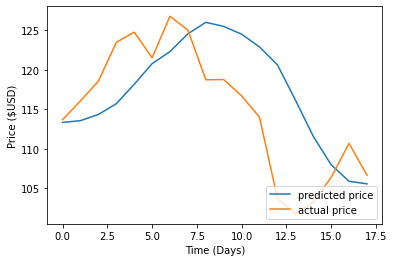

In [2]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Bidirectional, LSTM, Dropout

csv_path = r'C:\Users\Christian and Gemma\OneDrive\Graduate School\ANA680\Week 4\ABNB.csv'
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')

# Scale down pricing to between -1 and 1

scaler = MinMaxScaler()
close_price = df.Close.values.reshape(-1, 1)
scaled_close = scaler.fit_transform(close_price)

# Remove NaN Values

scaled_close = scaled_close[~np.isnan(scaled_close)]
scaled_close = scaled_close.reshape(-1, 1)

# Create Sequences
SEQ_LEN = 100

def to_sequences(data, seq_len):
    d = []

    for index in range(len(data) - seq_len):
        d.append(data[index: index + seq_len])

    return np.array(d)

def preprocess(data_raw, seq_len, train_split):

    data = to_sequences(data_raw, seq_len)

    num_train = int(train_split * data.shape[0])

    X_train = data[:num_train, :-1, :]
    y_train = data[:num_train, -1, :]

    X_test = data[num_train:, :-1, :]
    y_test = data[num_train:, -1, :]

    return X_train, y_train, X_test, y_test

X_train, y_train, X_test, y_test =\
 preprocess(scaled_close, SEQ_LEN, train_split = 0.95)

# Build LSTM Model

DROPOUT = 0.2
WINDOW_SIZE = SEQ_LEN - 1

model = keras.Sequential()

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=True),
    input_shape=(WINDOW_SIZE, X_train.shape[-1])))

model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM((WINDOW_SIZE * 2), return_sequences=True)))

model.add(Dropout(rate=DROPOUT))

model.add(Bidirectional(LSTM(WINDOW_SIZE, return_sequences=False)))

model.add(Dense(units=1))

model.add(Activation('linear'))

model.summary()

# Train Model

BATCH_SIZE = 64

model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=BATCH_SIZE,
    shuffle=False,
    validation_split=0.1
)

# Test Model and Predict Forward Prices

y_hat = model.predict(X_test)

y_test_inverse = scaler.inverse_transform(y_test)
y_hat_inverse = scaler.inverse_transform(y_hat)

# Plot Testing

plt.plot(y_hat_inverse, label='predicted price')
plt.plot(y_test_inverse, label = 'actual price')
plt.xlabel('Time (Days)')
plt.ylabel('Price ($USD)')
plt.legend(loc='lower right')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

csv_path = r'C:\Users\Christian and Gemma\OneDrive\Graduate School\ANA680\Week 4\ABNB.csv'
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-11,146.550003,151.500000,135.100006,139.250000,139.250000,26980800
1,2020-12-14,135.000000,135.300003,125.160004,130.000000,130.000000,16966100
2,2020-12-15,126.690002,127.599998,121.500000,124.800003,124.800003,10914400
3,2020-12-16,125.830002,142.000000,124.910004,137.990005,137.990005,20409600
4,2020-12-17,143.000000,152.449997,142.669998,147.050003,147.050003,15054700


In [4]:
print(X_train)

[[[0.39268942]
  [0.32028804]
  [0.27958675]
  ...
  [0.61858174]
  [0.62476515]
  [0.57334067]]

 [[0.32028804]
  [0.27958675]
  [0.38282722]
  ...
  [0.62476515]
  [0.57334067]
  [0.50532248]]

 [[0.27958675]
  [0.38282722]
  [0.45374142]
  ...
  [0.57334067]
  [0.50532248]
  [0.4863025 ]]

 ...

 [[0.57514088]
  [0.55706012]
  [0.55596433]
  ...
  [0.18581715]
  [0.19145273]
  [0.18378207]]

 [[0.55706012]
  [0.55596433]
  [0.64785542]
  ...
  [0.19145273]
  [0.18378207]
  [0.18816533]]

 [[0.55596433]
  [0.64785542]
  [0.63885409]
  ...
  [0.18378207]
  [0.18816533]
  [0.19035693]]]
